## Salary Prediction

### EDA

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings( 'ignore' )
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("CAGEDMOV202207.txt", sep=";")
ocup = pd.read_excel('Layout Não-identificado Novo Caged Movimentação.xlsx', sheet_name='cbo2002ocupação')


In [3]:
df.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
0,202207,2,26,261160,N,8121400,-1,351305,101,7,...,0,0,"2403,79",7,0,1,202207,0,5,"2403,79"
1,202207,4,41,410400,P,8591100,-1,422105,101,7,...,0,0,"1524,60",1,0,1,202207,0,5,"1524,60"
2,202207,2,25,250400,G,4691500,1,784105,101,7,...,0,1,"826,50",7,0,1,202207,0,5,"826,50"
3,202207,4,41,412550,H,4930202,-1,783215,101,5,...,0,0,"1871,40",7,0,1,202207,0,5,"1871,40"
4,202207,3,35,352010,C,2861500,1,724410,101,7,...,0,0,"2524,45",6,0,1,202207,0,1,"11,62"


In [4]:
ocup.head()

,Código,Descrição
0,10105,Oficial General da Aeronautica
1,10110,Oficial General do Exercito
2,10115,Oficial General da Marinha
3,10205,Oficial da Aeronautica
4,10210,Oficial do Exercito


In [5]:
df = pd.merge(df, ocup, left_on='cbo2002ocupação', right_on='Código', how='inner',indicator=False).drop(columns = ['Código'])

In [6]:
df.sample(5)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2198318,202207,3,35,354660,A,131800,1,622505,999,5,...,0,"545,45",7,0,2,202207,0,5,"545,45",Trabalhador no Cultivo de Arvores Frutiferas
1972209,202207,3,35,355030,N,8129000,1,622010,101,7,...,0,"1321,42",1,0,1,202207,0,5,"1321,42",Jardineiro
68309,202207,3,35,350160,G,4711302,1,784105,101,7,...,0,"1215,00",7,0,1,202207,0,5,"1215,00","Embalador, a Mao"
559644,202207,3,33,330500,M,7112000,-1,999999,103,7,...,9,"602,97",9,1,1,202207,0,5,"602,97",Não Identificado
2912393,202207,4,43,431350,C,1533500,-1,764005,101,4,...,0,"1370,60",10,0,1,202207,0,1,"6,23",Trabalhador Polivalente da Confeccao de Calcados


In [7]:
# Filtros (uf = SP | município = São Paulo | CBO = 212 [Aréas relacionadas a tecnologia])
df = df[(df.uf == 35) & (df.município == 355030) & (df.cbo2002ocupação.isin([212205, 212210, 212215, 212305, 212310, 212315, 212320, 212405, 212410, 212415, 212420, 212425, 212430]))]
df.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2351401,202207,3,35,355030,J,6201501,1,212415,101,9,...,0,"5000,00",5,0,1,202207,0,5,"5000,00",Analista de Sistemas de Automacao
2351413,202207,3,35,355030,J,6204000,1,212415,101,9,...,0,"8600,00",10,0,1,202207,0,5,"8600,00",Analista de Sistemas de Automacao
2351418,202207,3,35,355030,J,6201501,-1,212415,101,8,...,0,"5153,59",7,0,1,202207,0,5,"5153,59",Analista de Sistemas de Automacao
2351427,202207,3,35,355030,G,4642701,1,212415,101,7,...,0,"3000,00",3,0,1,202207,0,5,"3000,00",Analista de Sistemas de Automacao
2351448,202207,3,35,355030,J,6201501,1,212415,101,9,...,0,"7500,00",9,0,1,202207,0,5,"7500,00",Analista de Sistemas de Automacao


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8936 entries, 2351401 to 3531670
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competênciamov          8936 non-null   int64  
 1   região                  8936 non-null   int64  
 2   uf                      8936 non-null   int64  
 3   município               8936 non-null   int64  
 4   seção                   8936 non-null   object 
 5   subclasse               8936 non-null   int64  
 6   saldomovimentação       8936 non-null   int64  
 7   cbo2002ocupação         8936 non-null   int64  
 8   categoria               8936 non-null   int64  
 9   graudeinstrução         8936 non-null   int64  
 10  idade                   8936 non-null   float64
 11  horascontratuais        8935 non-null   object 
 12  raçacor                 8936 non-null   int64  
 13  sexo                    8936 non-null   int64  
 14  tipoempregador          8936 no

In [9]:
df.shape

(8936, 29)

In [10]:
(df.isna().sum() / len(df)) * 100

competênciamov            0.000000
região                    0.000000
uf                        0.000000
município                 0.000000
seção                     0.000000
subclasse                 0.000000
saldomovimentação         0.000000
cbo2002ocupação           0.000000
categoria                 0.000000
graudeinstrução           0.000000
idade                     0.000000
horascontratuais          0.011191
raçacor                   0.000000
sexo                      0.000000
tipoempregador            0.000000
tipoestabelecimento       0.000000
tipomovimentação          0.000000
tipodedeficiência         0.000000
indtrabintermitente       0.000000
indtrabparcial            0.000000
salário                   0.000000
tamestabjan               0.000000
indicadoraprendiz         0.000000
origemdainformação        0.000000
competênciadec            0.000000
indicadordeforadoprazo    0.000000
unidadesaláriocódigo      0.000000
valorsaláriofixo          0.000000
Descrição           

In [11]:
df['salário'] = df['salário'].str.replace(',','.').astype(float)
df['valorsaláriofixo'] = df['valorsaláriofixo'].str.replace(',','.').astype(float)
df['horascontratuais'] = df['horascontratuais'].str.replace(',','.').astype(float)

In [12]:
df.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2351401,202207,3,35,355030,J,6201501,1,212415,101,9,...,0,5000.00,5,0,1,202207,0,5,5000.00,Analista de Sistemas de Automacao
2351413,202207,3,35,355030,J,6204000,1,212415,101,9,...,0,8600.00,10,0,1,202207,0,5,8600.00,Analista de Sistemas de Automacao
2351418,202207,3,35,355030,J,6201501,-1,212415,101,8,...,0,5153.59,7,0,1,202207,0,5,5153.59,Analista de Sistemas de Automacao
2351427,202207,3,35,355030,G,4642701,1,212415,101,7,...,0,3000.00,3,0,1,202207,0,5,3000.00,Analista de Sistemas de Automacao
2351448,202207,3,35,355030,J,6201501,1,212415,101,9,...,0,7500.00,9,0,1,202207,0,5,7500.00,Analista de Sistemas de Automacao


In [13]:
pd.DataFrame({'': df.nunique().index , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,competênciamov,1
1,região,1
2,uf,1
3,município,1
4,seção,19
5,subclasse,329
6,saldomovimentação,2
7,cbo2002ocupação,13
8,categoria,6
9,graudeinstrução,11


In [14]:
var_quant = [
    "idade", 
    "horascontratuais", 
    "salário", 
    "valorsaláriofixo"]

var_qua = [
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "unidadesaláriocódigo"
]

var_quali = [
    "região",
    "uf",
    "município",
    "seção",
    "subclasse",
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "competênciadec",
    "competênciaexc",
    "indicadordeexclusão",
    "indicadordeforadoprazo",
    "unidadesaláriocódigo"
]

label_quali = {
  "sexo": {1: 'Masculino', 3: 'Feminino', 9: 'Não Identificado'},
  "raçacor": {1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não informada', 9: 'Não Identificado'},
  "graudeinstrução": {1: "Analfabeto", 2: "Até 5ª Incompleto", 3: "5ª Completo Fundamental", 4: "6ª a 9ª Fundamental", 5: "Fundamental Completo", 6: "Médio Incompleto", 7: "Médio Completo", 8: "Superior Incompleto", 9: "Superior Completo", 10: "Mestrado", 11: "Doutorado", 80: "Pós-Graduação completa", 99: "Não Identificado"},
  
}

In [15]:
# Unidade de pagamento da parte fixa da remuneração (5 = mensal)
df.unidadesaláriocódigo.value_counts()

5     8920
1       15
99       1
Name: unidadesaláriocódigo, dtype: int64

In [9]:
cat = list(df.select_dtypes(include='object').columns)
num  = list(df.select_dtypes(exclude='object').columns)
ordering = num + cat 
df = df[ordering]

In [16]:
def generate_plot(df, row, col):
    plt.figure(figsize=(25,40));
    for i, feat in enumerate(df):
        plt.subplot(row,col, i+1)
        if df[feat].dtypes == 'object':
            sns.countplot(y=df[feat])
            #plt.xticks(rotation=90)
            plt.tight_layout();
        else:
            sns.distplot(x=df[feat], color='c')
            plt.tight_layout();
            plt.xlabel(feat);

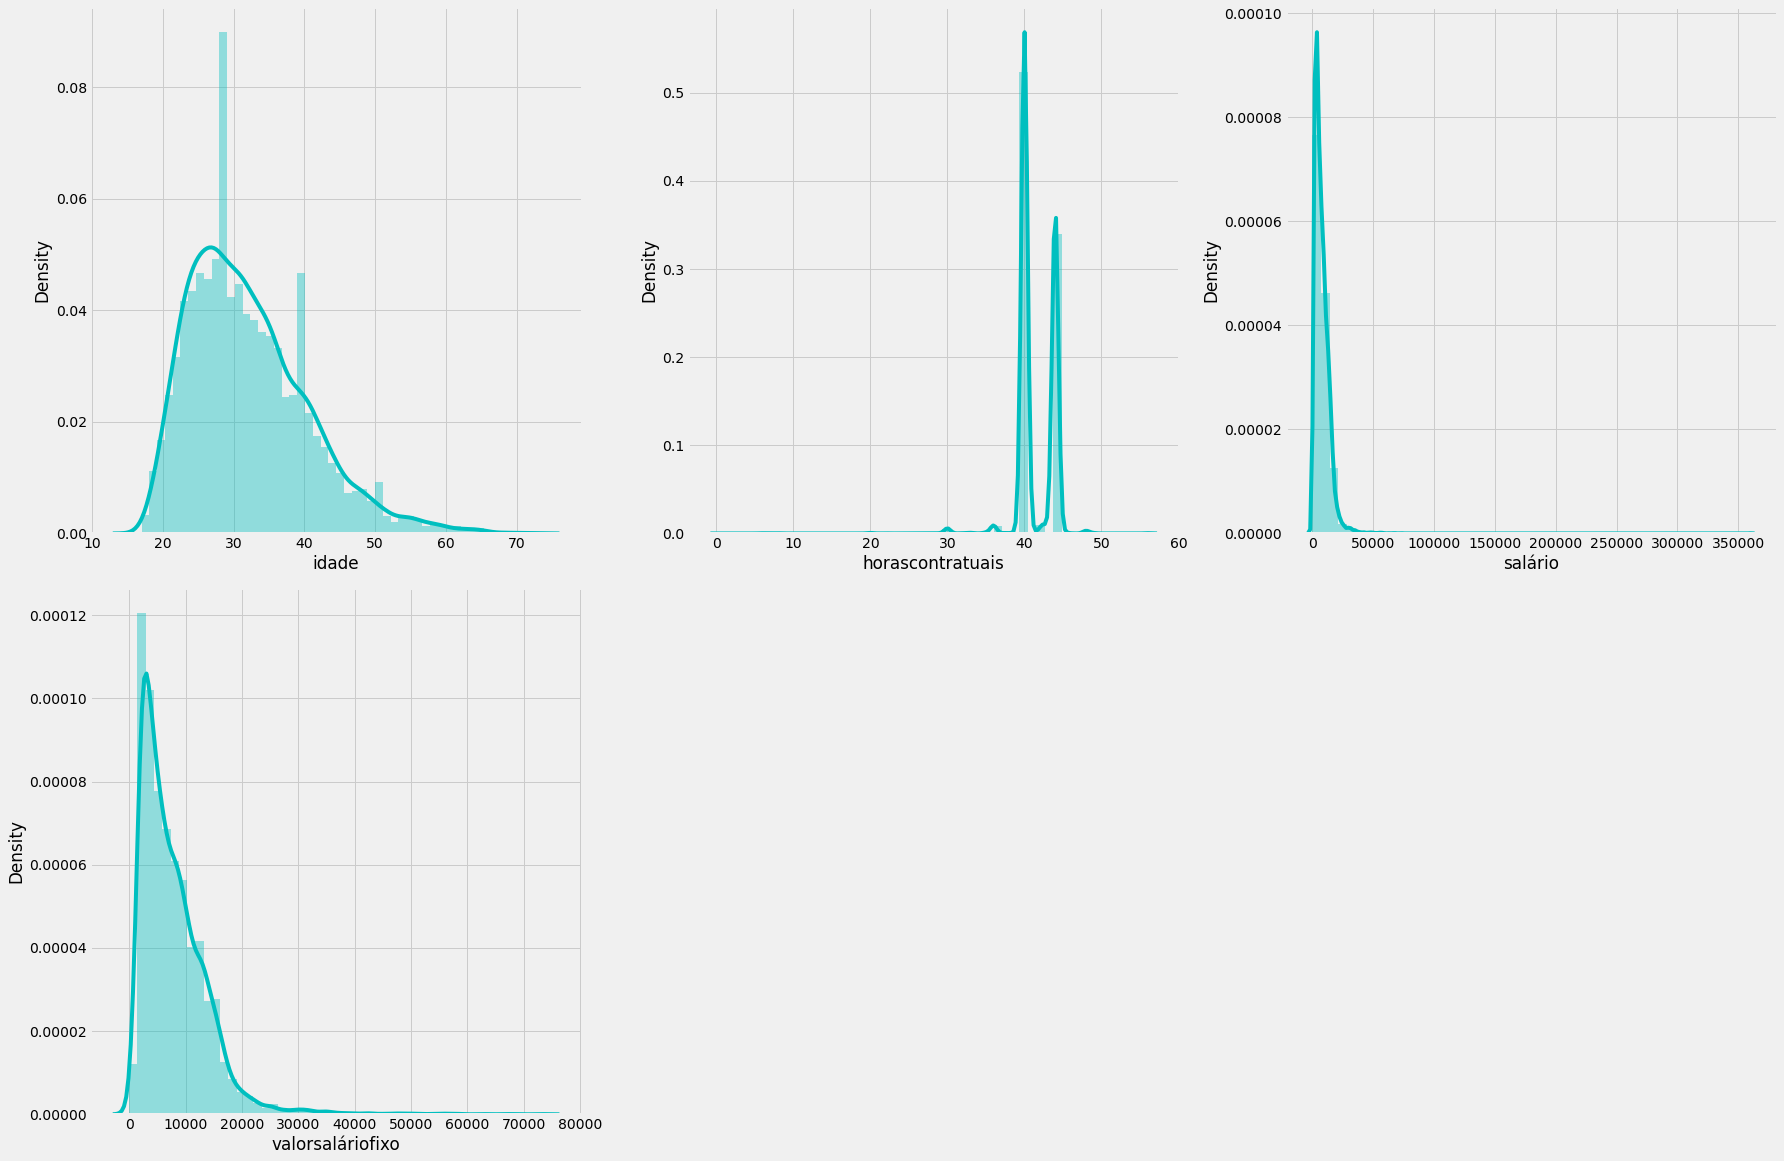

In [17]:
generate_plot(df[var_quant],5,3)

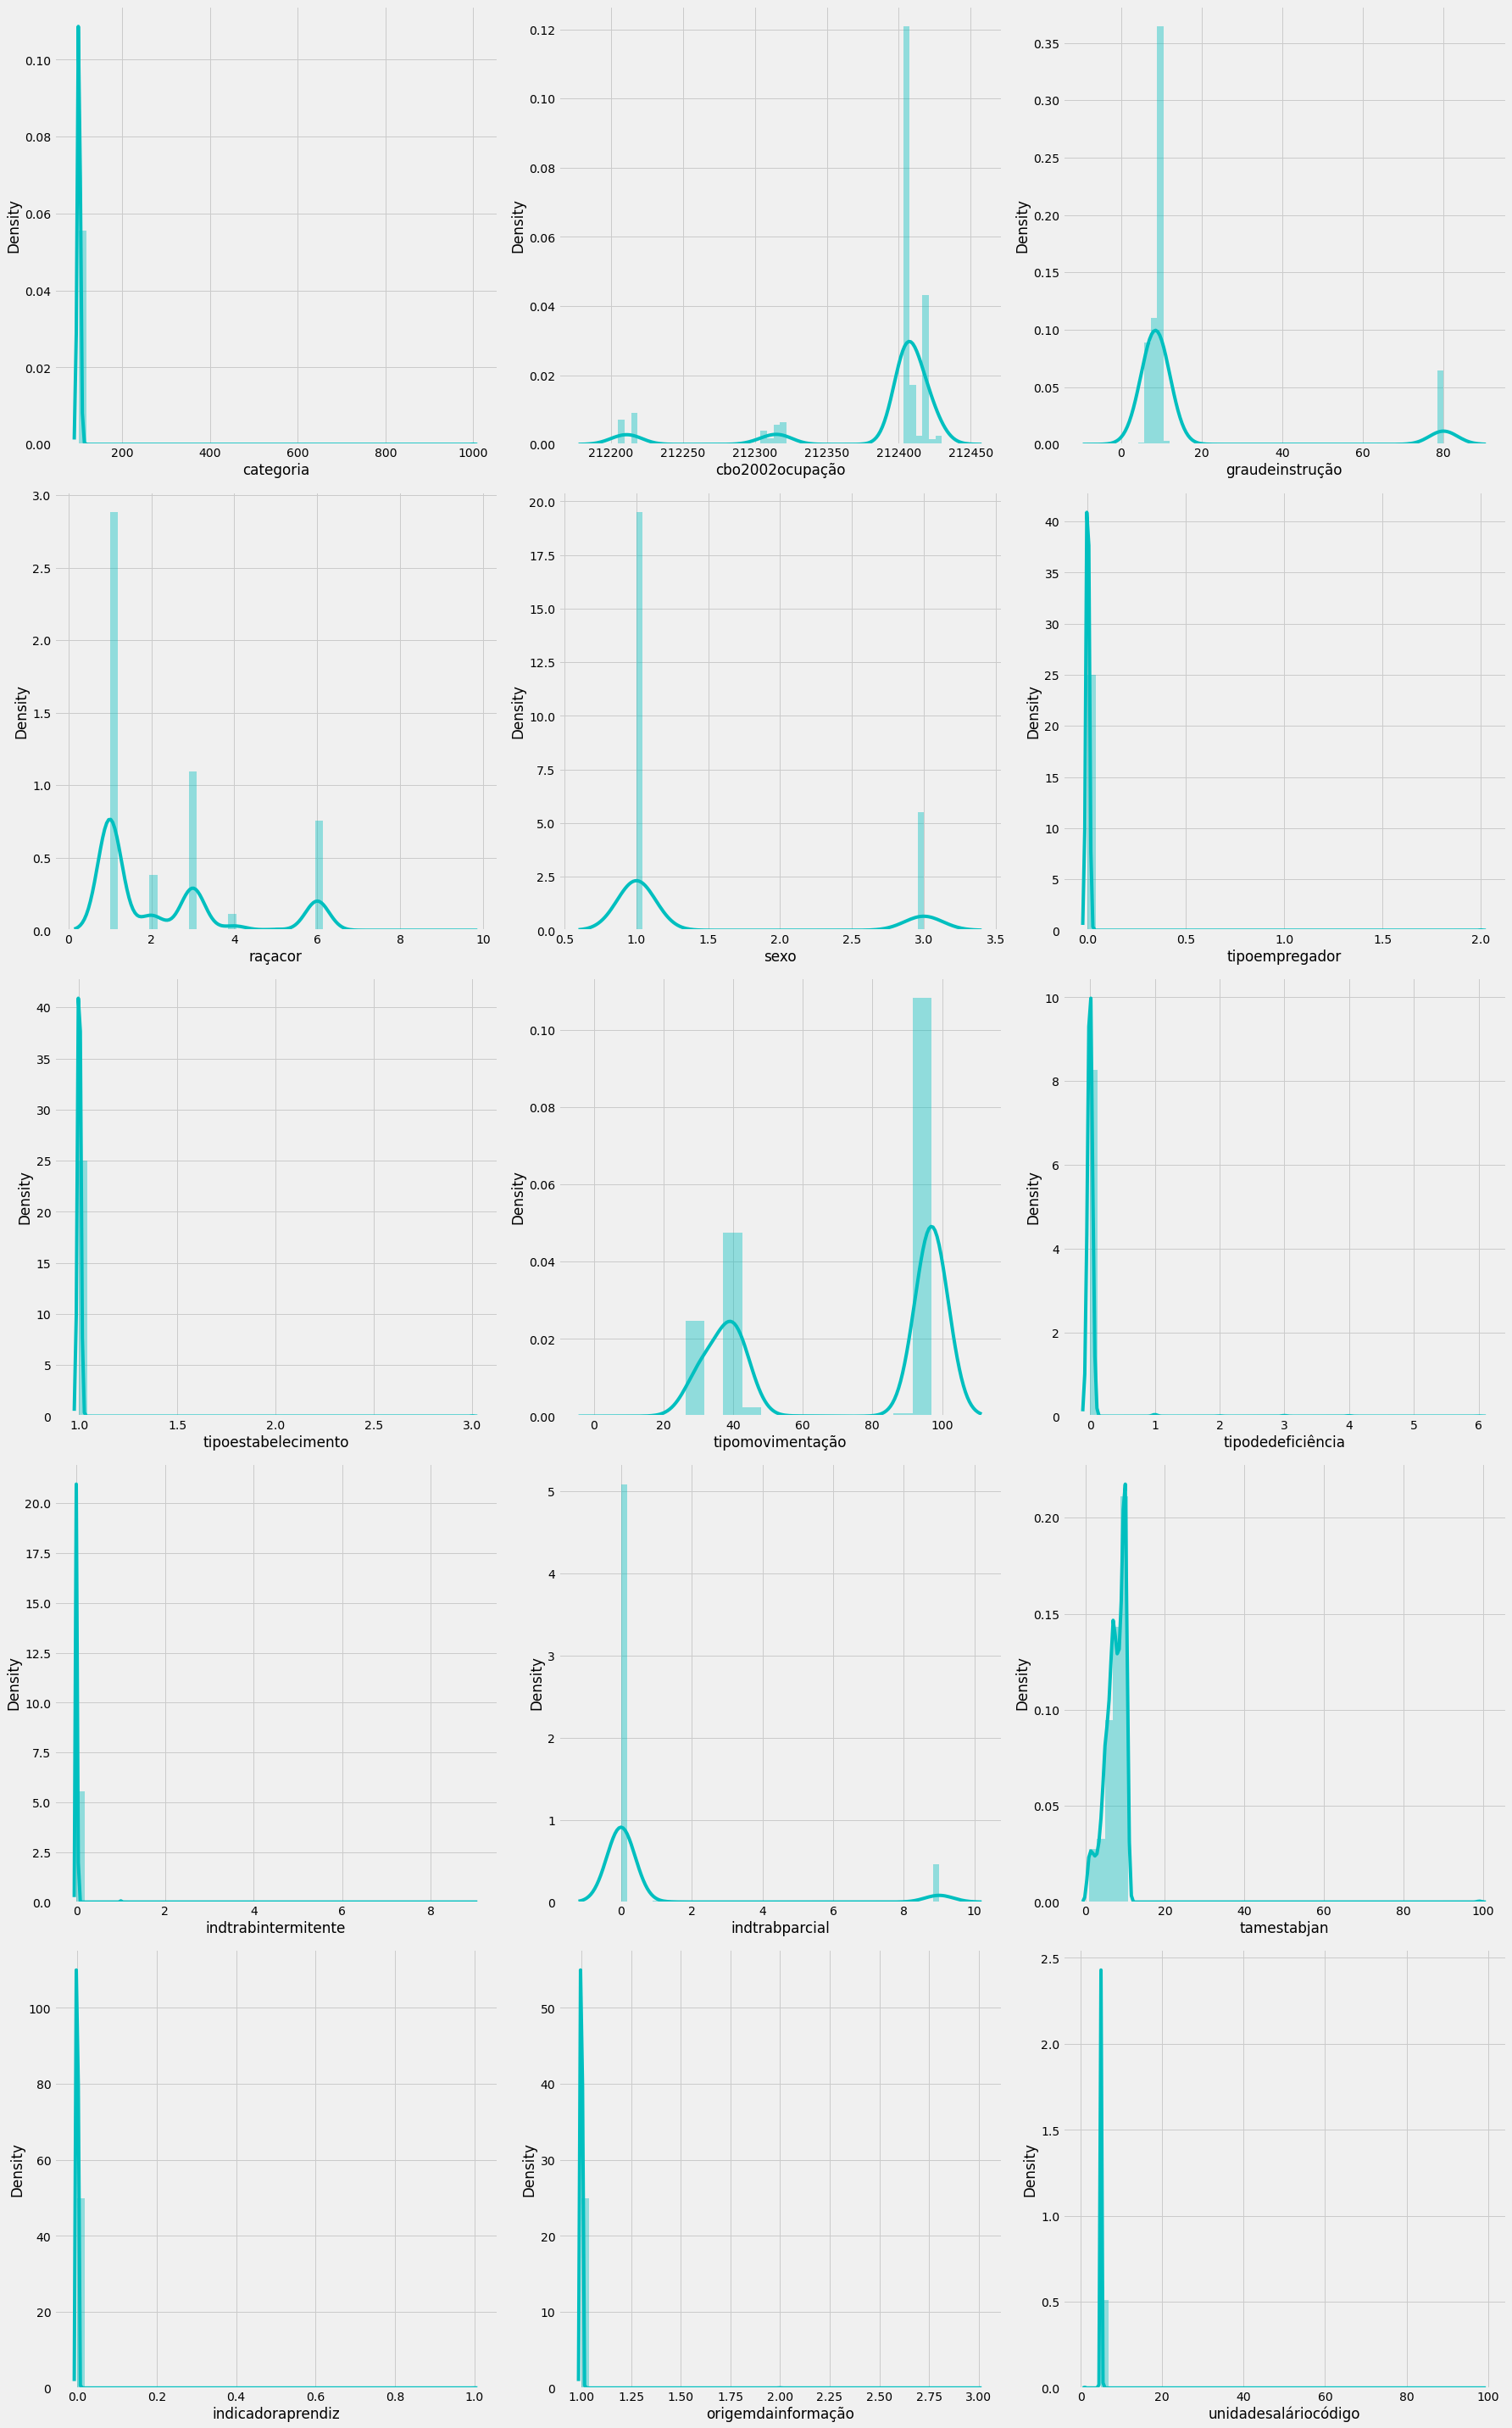

In [18]:
generate_plot(df[var_qua],5,3)

In [19]:
list(df.select_dtypes(exclude='object').columns)

['competênciamov',
 'região',
 'uf',
 'município',
 'subclasse',
 'saldomovimentação',
 'cbo2002ocupação',
 'categoria',
 'graudeinstrução',
 'idade',
 'horascontratuais',
 'raçacor',
 'sexo',
 'tipoempregador',
 'tipoestabelecimento',
 'tipomovimentação',
 'tipodedeficiência',
 'indtrabintermitente',
 'indtrabparcial',
 'salário',
 'tamestabjan',
 'indicadoraprendiz',
 'origemdainformação',
 'competênciadec',
 'indicadordeforadoprazo',
 'unidadesaláriocódigo',
 'valorsaláriofixo']

In [20]:
df[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
idade,8936.0,32.02,8.35,17.00,26.0,31.00,37.00,48.0,57.00,72.00
horascontratuais,8935.0,41.43,2.51,0.44,40.0,40.00,44.00,44.0,44.00,56.00
salário,8936.0,7885.41,7040.54,0.00,3500.0,6451.80,10769.23,17500.0,29633.14,360000.00
valorsaláriofixo,8936.0,7840.36,5976.95,0.00,3500.0,6451.62,10769.23,17500.0,29521.66,73425.04


In [26]:
df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
competênciamov,8936.0,202207.00,0.00,202207.0,202207.0,202207.0,202207.00,202207.0,202207.00,202207.0
região,8936.0,3.00,0.00,3.0,3.0,3.0,3.00,3.0,3.00,3.0
uf,8936.0,35.00,0.00,35.0,35.0,35.0,35.00,35.0,35.00,35.0
município,8936.0,355030.00,0.00,355030.0,355030.0,355030.0,355030.00,355030.0,355030.00,355030.0
subclasse,8936.0,6496530.07,1119545.26,115600.0,6201501.0,6209100.0,6629100.00,8299799.0,9493600.00,9529102.0
saldomovimentação,8936.0,0.18,0.98,-1.0,-1.0,1.0,1.00,1.0,1.00,1.0
cbo2002ocupação,8936.0,212387.08,56.73,212205.0,212405.0,212405.0,212410.00,212420.0,212430.00,212430.0
categoria,8936.0,101.59,21.25,101.0,101.0,101.0,101.00,101.0,106.00,999.0
graudeinstrução,8936.0,15.76,21.62,1.0,8.0,9.0,9.00,80.0,80.00,80.0
idade,8936.0,32.02,8.35,17.0,26.0,31.0,37.00,48.0,57.00,72.0


In [ ]:
# To put percentage numbers above chart ( With hue , Without hue)

def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def percen_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [92]:
# Função para construir boxplot

def grafico_boxplot(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="phq_grp2", y=variable, data=data)
    plt.ylabel(label)
    plt.show()

In [60]:
# Função para construir grafico de barras

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = True)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion"))
    plt.ylim(0,1)
    plt.show()

<AxesSubplot:xlabel='valorsaláriofixo'>

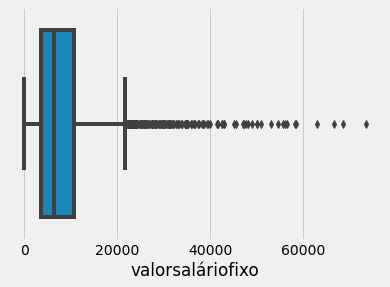

In [21]:
sns.boxplot(x=df.valorsaláriofixo)

<AxesSubplot:xlabel='idade'>

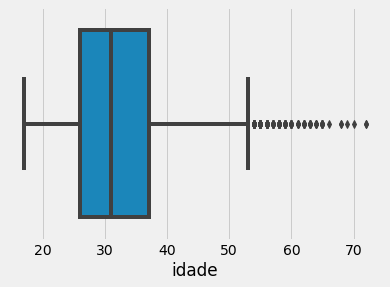

In [98]:
sns.boxplot(x=df.idade)

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='idade'>

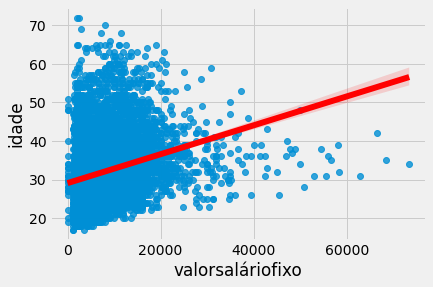

In [31]:
sns.regplot(x=df.valorsaláriofixo , y=df.idade, line_kws={'color': 'red'})

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='graudeinstrução'>

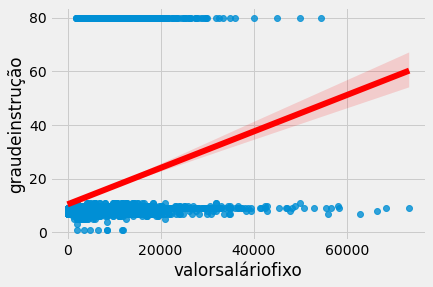

In [32]:
sns.regplot(x=df.valorsaláriofixo , y=df.graudeinstrução, line_kws={'color': 'red'})

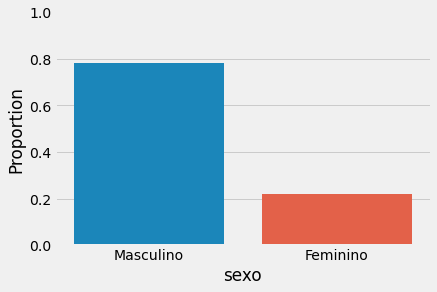

In [61]:
grafico_barras_prop(df.replace(label_quali), variable = "sexo")

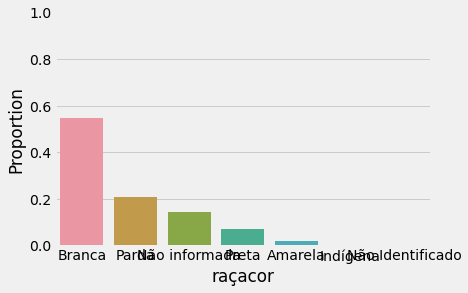

In [62]:
grafico_barras_prop(df.replace(label_quali), variable = "raçacor")

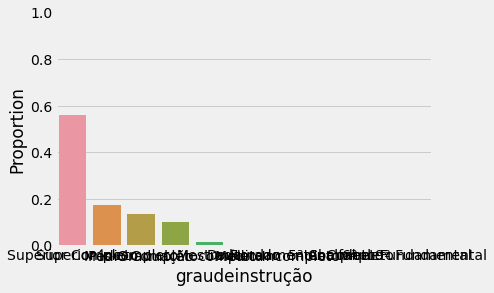

In [63]:
grafico_barras_prop(df.replace(label_quali), variable = "graudeinstrução")

In [23]:
df.valorsaláriofixo.value_counts(normalize=True).mul(100).round(0).astype(str) + ' %'

2500.00     2.0 %
6000.00     2.0 %
10000.00    2.0 %
8000.00     2.0 %
3000.00     2.0 %
            ...  
6274.79     0.0 %
8640.93     0.0 %
10984.51    0.0 %
4452.46     0.0 %
3237.00     0.0 %
Name: valorsaláriofixo, Length: 3597, dtype: object

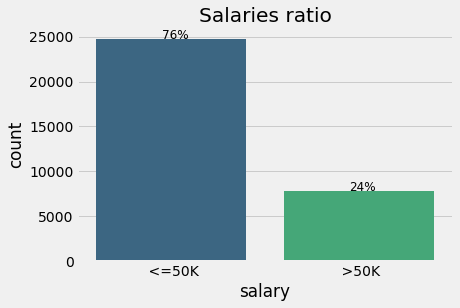

In [17]:
ax = sns.countplot( x=df.salary , data= df , palette='viridis')
ax.set_title('Salaries ratio')
percen(ax , df.salary)

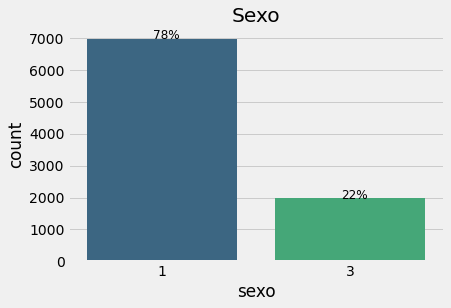

In [95]:
ax = sns.countplot( x=df[label_quali].sexo , data= df[label_quali] , palette='viridis')
ax.set_title('Sexo')
percen(ax , df.sexo)

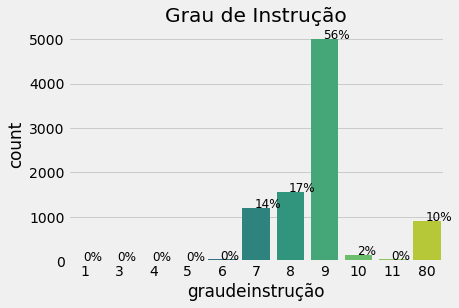

In [20]:
ax = sns.countplot( x=df.graudeinstrução , data= df , palette='viridis')
ax.set_title('Grau de Instrução')
percen(ax , df.graudeinstrução)

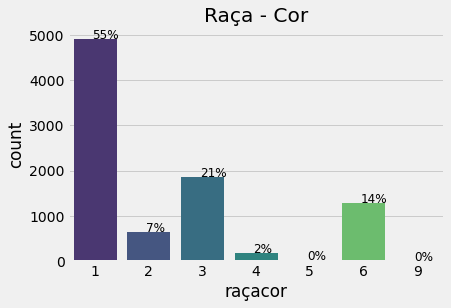

In [25]:
ax = sns.countplot( x=df.raçacor , data= df , palette='viridis')
ax.set_title('Raça - Cor')
percen(ax , df.raçacor)

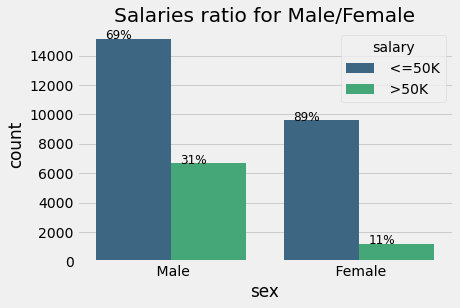

In [19]:
ax = sns.countplot(data=df, x='sex', hue='salary', palette='viridis')
ax.set_title('Salaries ratio for Male/Female')
percen_hue(ax,df.sex , 2,2)

In [24]:
df.raçacor.value_counts()

1    4907
3    1861
6    1290
2     650
4     191
5      36
9       1
Name: raçacor, dtype: int64

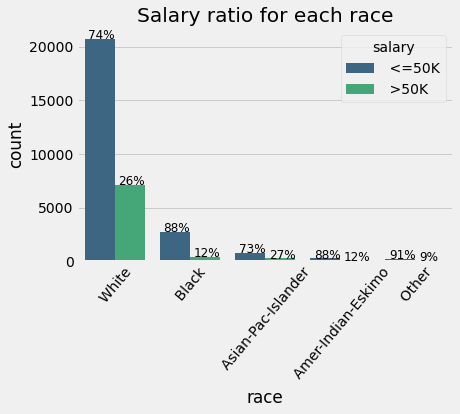

In [9]:
ax = sns.countplot(data=df, x='race', hue='salary', palette='viridis')
ax.set_title('Salary ratio for each race')
plt.xticks(rotation = 50)
percen_hue(ax,df.race , 5,2)

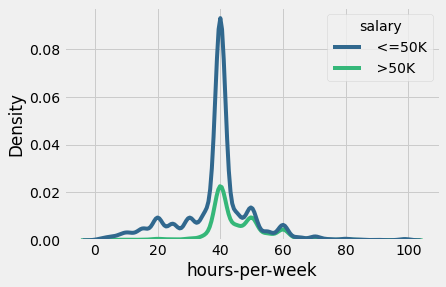

In [22]:
sns.kdeplot(data=df, x='hours-per-week', hue='salary', palette='viridis');

In [25]:
sns.kdeplot(data=df, x='idade', hue='valorsaláriofixo', palette='viridis');

ValueError: Image size of 464x75623 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

<AxesSubplot:>

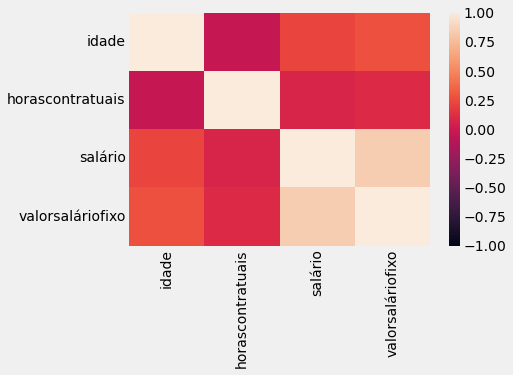

In [77]:
sns.heatmap(data=df[var_quant].corr(), vmin=-1, vmax=1 )

<AxesSubplot:>

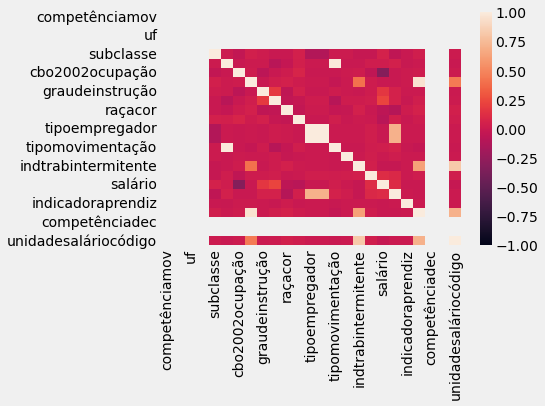

In [22]:
sns.heatmap(data=df.corr(), vmin=-1, vmax=1 )

In [36]:
df.corr().round(2)

,competênciamov,região,uf,município,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,...,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo
competênciamov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
região,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
município,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subclasse,NaN,NaN,NaN,NaN,1.00,0.01,-0.04,0.03,0.01,-0.01,...,0.00,0.01,-0.02,-0.02,-0.05,-0.01,0.02,NaN,NaN,0.00
saldomovimentação,NaN,NaN,NaN,NaN,0.01,1.00,-0.01,0.00,0.01,-0.09,...,0.99,-0.01,-0.01,0.02,0.05,-0.02,-0.00,NaN,NaN,-0.01
cbo2002ocupação,NaN,NaN,NaN,NaN,-0.04,-0.01,1.00,0.01,-0.07,-0.02,...,-0.01,0.00,0.01,-0.06,-0.01,0.01,0.01,NaN,NaN,0.00
categoria,NaN,NaN,NaN,NaN,0.03,0.00,0.01,1.00,-0.01,0.03,...,-0.04,-0.00,0.40,0.01,-0.01,0.00,0.95,NaN,NaN,0.44
graudeinstrução,NaN,NaN,NaN,NaN,0.01,0.01,-0.07,-0.01,1.00,0.18,...,0.01,-0.00,-0.01,0.01,0.05,-0.01,-0.01,NaN,NaN,-0.00
idade,NaN,NaN,NaN,NaN,-0.01,-0.09,-0.02,0.03,0.18,1.00,...,-0.10,0.01,0.02,0.03,0.05,-0.02,0.03,NaN,NaN,0.00


In [78]:
pd.DataFrame({'Grau de Instrução': df.groupby('graudeinstrução')['salário'].mean().index , 'Mean salary':  df.groupby('graudeinstrução')['salário'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1].head(10)

,Grau de Instrução,Mean salary
8,10,13271.368951
9,11,12364.392955
10,80,11022.024449
2,4,8500.000000
7,9,8414.427883
4,6,8039.556829
0,1,7204.817500
6,8,5702.383376
5,7,5412.286730
3,5,4677.604211


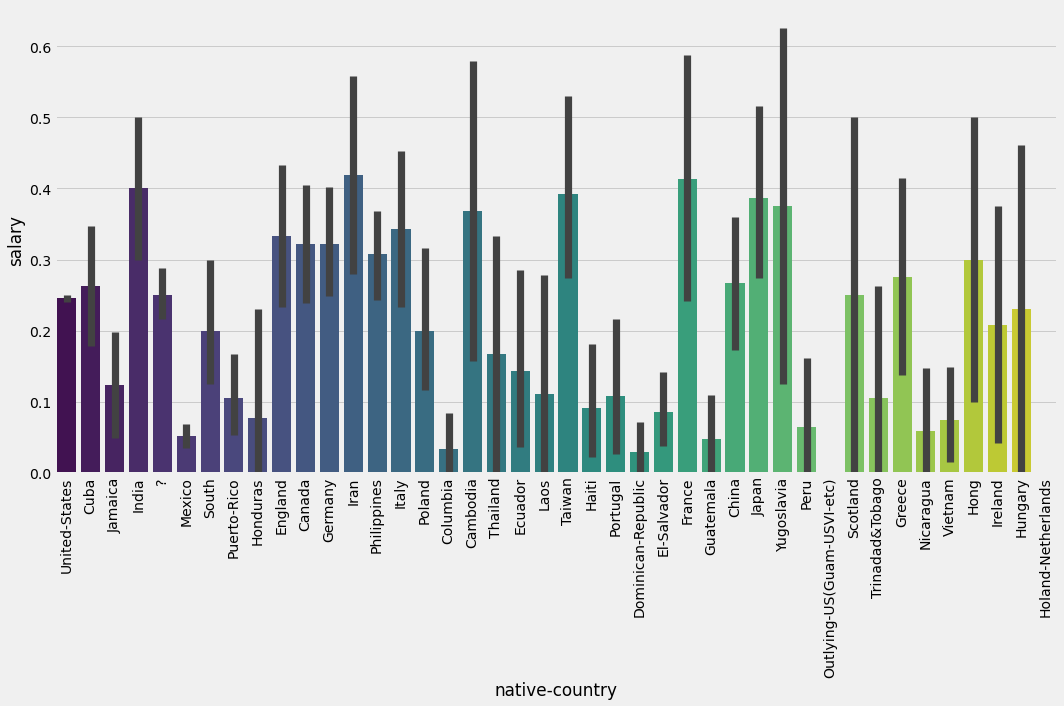

In [8]:
plt.figure(figsize=(16,8))
plt.xticks(rotation = 90)
sns.barplot(data=df, x="native-country", y="salary" , palette='viridis');

In [79]:
pd.DataFrame({'Idade': df.groupby('idade')['salário'].mean().index , 'Mean salary':  df.groupby('idade')['salário'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]


,Idade,Mean salary
42,59.0,12006.310667
36,53.0,11933.429048
43,60.0,11866.869167
46,63.0,11371.972500
45,62.0,11257.613750
41,58.0,11223.461053
44,61.0,11180.434000
22,39.0,10943.472478
28,45.0,10468.820093
25,42.0,10365.396608


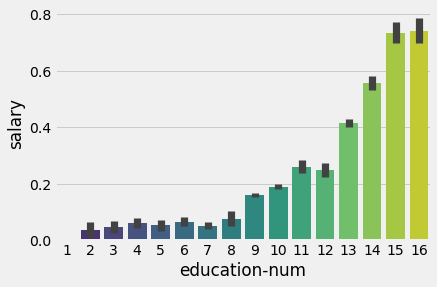

In [10]:
sns.barplot(data=df, x="education-num", y="salary" , palette='viridis');

In [84]:
pd.DataFrame({'Occupattion': df.groupby('Descrição')['salário'].mean().index , 'Mean salary':  df.groupby('Descrição')['salário'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Occupattion,Mean salary
12,Engenheiros de Sistemas Operacionais em Comput...,16167.067984
10,Engenheiro de Aplicativos em Computacao,15399.225860
11,Engenheiro de Equipamentos em Computacao,14152.786667
9,Arquiteto De Soluções De Tecnologia Da Informação,12690.927627
2,Administrador de Sistemas Operacionais,9624.424141
3,Administrador em Segurança da Informação,8867.286887
0,Administrador de Banco de Dados,8620.429161
5,Analista de Desenvolvimento de Sistemas,8054.653519
1,Administrador de Redes,7489.976986
4,Analista De Testes De Tecnologia Da Informação,6047.784141


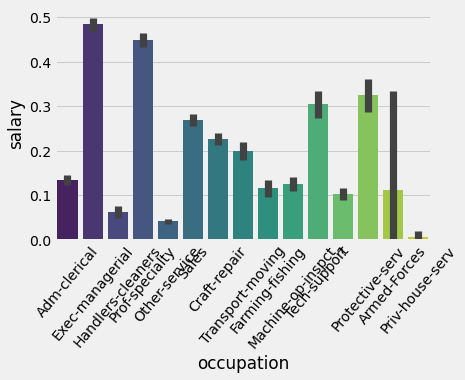

In [12]:
sns.barplot(data=df, x="occupation", y="salary" , palette='viridis');
plt.xticks(rotation = 50)

In [14]:
pd.DataFrame({'Marital Status': df.groupby('marital-status')['salary'].mean().index , 'Mean salary':  df.groupby('marital-status')['salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Marital Status,Mean salary
2,Married-civ-spouse,0.446848
1,Married-AF-spouse,0.434783
0,Divorced,0.104209
6,Widowed,0.085599
3,Married-spouse-absent,0.081340
5,Separated,0.064390
4,Never-married,0.045961


<AxesSubplot:xlabel='marital-status', ylabel='salary'>

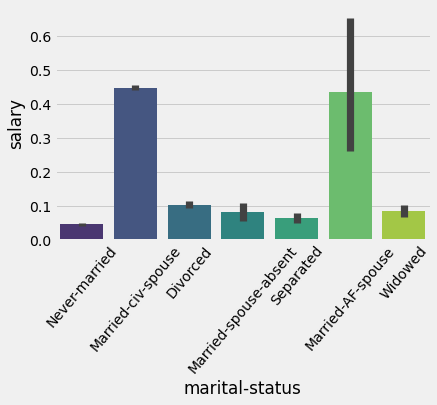

In [16]:
sns.barplot(data=df, x="marital-status", y="salary" , palette='viridis')
plt.xticks(rotation = 50)

In [17]:
pd.DataFrame({'Relationship': df.groupby('relationship')['salary'].mean().index , 'Mean salary':  df.groupby('relationship')['salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Relationship,Mean salary
5,Wife,0.475128
0,Husband,0.448571
1,Not-in-family,0.103070
4,Unmarried,0.063262
2,Other-relative,0.037717
3,Own-child,0.013220


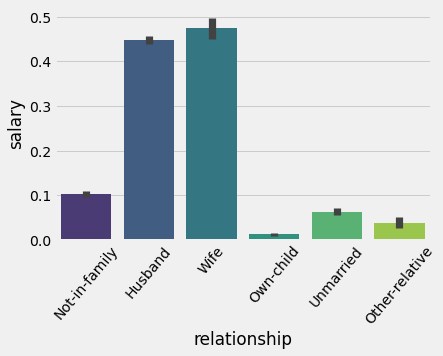

In [20]:
plt.xticks(rotation = 50)
sns.barplot(data=df, x="relationship", y="salary" , palette='viridis');

In [21]:
pd.DataFrame({'Workclass': df.groupby('workclass')['salary'].mean().index , 'Mean salary':  df.groupby('workclass')['salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Workclass,Mean salary
5,Self-emp-inc,0.557348
1,Federal-gov,0.386458
2,Local-gov,0.294792
6,Self-emp-not-inc,0.284927
7,State-gov,0.271957
4,Private,0.218673
0,?,0.104031
8,Without-pay,0.000000
3,Never-worked,0.000000


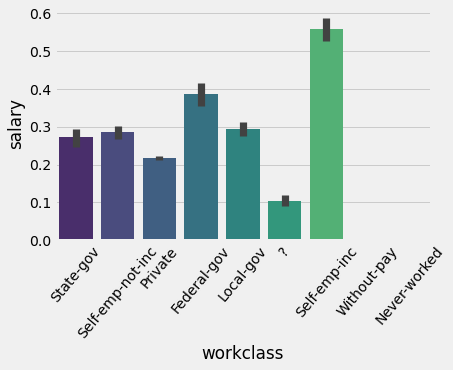

In [27]:
plt.xticks(rotation = 50)
sns.barplot(data=df, x="workclass", y="salary" , palette='viridis');


In [28]:
# Fill NaN values by MODE

df['workclass'].fillna(df['workclass'].value_counts().idxmax() , axis=0 ,inplace=True)
df['occupation'].fillna(df['occupation'].value_counts().idxmax() , axis=0 ,inplace=True)
df['native-country'].fillna(df['native-country'].value_counts().idxmax() , axis=0 ,inplace=True)

In [29]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [30]:
# Formatting [sex] column 

df['sex']= df['sex'].map({'Female': 0, 'Male': 1})
df['sex'].value_counts()

1    21790
0    10771
Name: sex, dtype: int64

In [26]:
df['graudeinstrução'].value_counts()

9     5002
8     1558
7     1211
80     908
10     143
11      44
6       41
5       19
1        8
3        1
4        1
Name: graudeinstrução, dtype: int64

In [32]:
# Formating [ Education ] column

int_list = list(df[df['education'].str.contains('th')]['education'].unique())
int_list.append('Preschool')
df['education'] =  df['education'].replace(int_list , 'Low Education')

df['education'] =  df['education'].replace('HS-grad' , 'Intermediate Education')

hg_list= list(set(df[df['education'].str.contains('-')]['education']))
df['education'] =  df['education'].replace(hg_list , 'Above Intermediate')

In [33]:
df['education'].value_counts()

Intermediate Education    10501
Above Intermediate        10316
Bachelors                  5355
Low Education              4253
Masters                    1723
Doctorate                   413
Name: education, dtype: int64

### Modeling